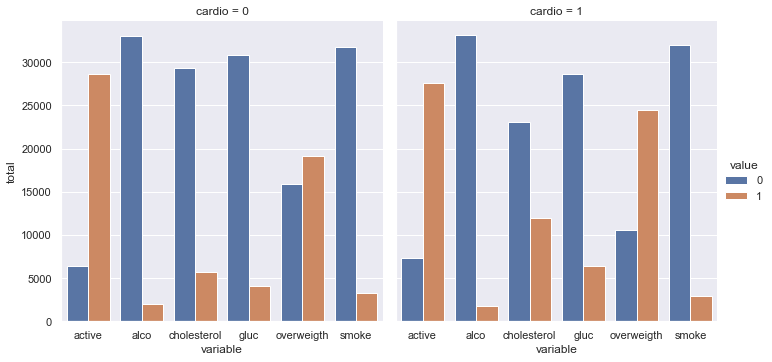

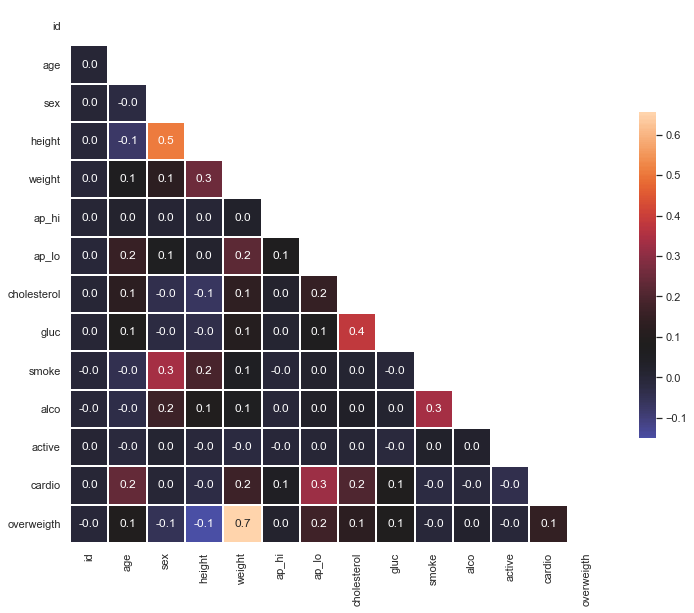

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweigth'] = (df['weight']/(df['height']/100)**2).apply(lambda x: 1 if x > 25 else 0)


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x:0 if x == 1 else 1) 
df['gluc'] = df['gluc'].apply(lambda x:0 if x == 1 else 1) 

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'. pd.melt -> different columns are variables
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweigth','smoke'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly 
    
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()  

  
    # Draw the catplot with 'sns.catplot()'
    sns.set_theme(style='darkgrid')  
    graph = sns.catplot(y="total", x='variable', hue="value", kind="bar", col='cardio',data=df_cat)
    fig = graph.fig


    # showing figure
    fig.savefig('catplot.png')
    return

#Drawing Heat Map
def draw_heat_map():
    #Cleaning the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    #Method pearson: standard correlation coefficient
    corr = df_heat.corr(method='pearson')

    # Generate a mask for the upper triangle
    #triu: upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    
    # Draw the heatmap with 'sns.heatmap()'
    #fig, ax = plt.subplots(figsize=(12,12)) #grid and plot
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(12, 12))
        ax = sns.heatmap(corr, linewidths= 1, annot= True, square= True, mask = mask, fmt= '.1f', center=0.08, 
                cbar_kws={'shrink':0.5})
    
    #saving heatmap
    f.savefig('heatmap.png')
    return 


draw_cat_plot()
draw_heat_map()
